In [10]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

In [2]:
!pip install pyarrow

In [3]:
def plot_timeseries(df: pd.DataFrame, indx=0 ) -> None:
    '''Plot the generated time series data.
        Args:
            df: Pandas DataFrame with the generated data
            indx: index of the time series to plot
        '''
    df[f'y{indx}' ].plot(style='o')
  

    plt.show()

In [8]:
df_single = pd.read_feather("Project data/timeseries_single_frequency.feather")
print(df_single[f'y{50}' ])

0.000000     -0.119718
2.040816      0.199222
4.081633      0.497865
6.122449      0.745781
8.163265      0.917710
10.204082     0.996135
12.244898     0.973065
14.285714     0.850852
16.326531     0.641946
18.367347     0.367633
20.408163     0.055863
22.448980    -0.261599
24.489796    -0.552407
26.530612    -0.786931
28.571429    -0.941276
30.612245    -0.999716
32.653061    -0.956296
34.693878    -0.815441
36.734694    -0.591501
38.775510    -0.307294
40.816327     0.008222
42.857143     0.322901
44.897959     0.604679
46.938776     0.824848
48.979592     0.960975
51.020408     0.999189
53.061224     0.935597
55.102041     0.776679
57.142857     0.538626
59.183673     0.245693
61.224490    -0.072273
63.265306    -0.382875
65.306122    -0.654467
67.346939    -0.859376
69.387755    -0.976725
71.428571    -0.994556
73.469388    -0.911054
75.510204    -0.734725
77.551020    -0.483537
79.591837    -0.183082
81.632653     0.136027
83.673469     0.441277
85.714286     0.701565
87.755102  

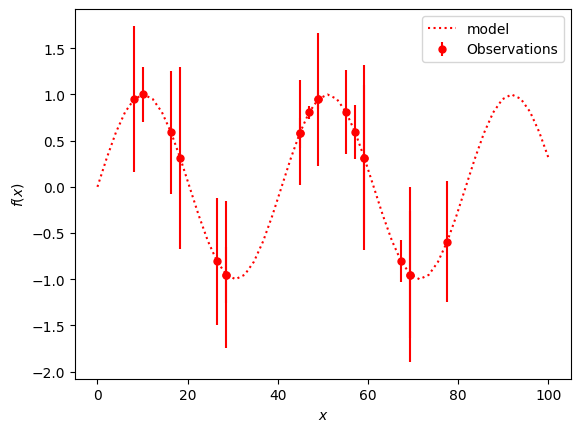

In [23]:
def f(x):
    '''function to
    model'''
    h = np.sin(x/6.5)
    return h
Nrandom = 20

x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714, 16.326531, 18.367347,
    20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245, 32.653061, 34.693878, 36.734694, 38.775510,
    40.816327, 42.857143, 44.897959, 46.938776, 48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673,
    61.224490, 63.265306, 65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367, 97.959184, 100.000000])
    

y = np.array([ -0.119718, 0.199222, 0.497865, 0.745781, 0.917710, 0.996135, 0.973065, 0.850852, 0.641946, 0.367633,
    0.055863, -0.261599, -0.552407, -0.786931, -0.941276, -0.999716, -0.956296, -0.815441, -0.591501, -0.307294,
    0.008222, 0.322901, 0.604679, 0.824848, 0.960975, 0.999189, 0.935597, 0.776679, 0.538626, 0.245693,
    -0.072273, -0.382875, -0.654467, -0.859376, -0.976725, -0.994556, -0.911054, -0.734725, -0.483537, -0.183082,
    0.136027, 0.441277, 0.701565, 0.890372, 0.988461, 0.985836, 0.882766, 0.689753, 0.426461, 0.119718
])
x_model = x
y_model = f(x)


x = x_model[np.sort(np.random.randint (0, 40, Nrandom))]
y_true = f(x)
dy = 0.05 +  np.random.random(y_true.shape)
y = y_true 

plt.figure()
plt.plot(x_model, y_model, 'r:', label='model')
plt.errorbar(x, y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  5.16**2 * RBF(length_scale=21.6)


Text(0, 0.5, '$f(x)$')

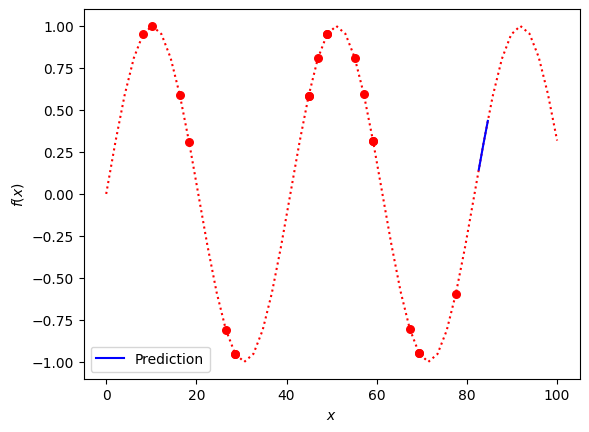

In [24]:
kernel = np.var(y)*k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)
gp.fit(np.atleast_2d(x).T, y_true)
print("Optimized hyper parameters: ", gp.kernel_)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict([[x_model[len(x_model)-10]+1],[x_model[len(x_model)-10]+2],[x_model[len(x_model)-10]+3]], return_std=True)

plt.figure()
plt.plot(x_model, y_model, 'r:')
plt.scatter(x, y_true, c='r', s=30)

plt.plot([[x_model[len(x_model)-10]+1],[x_model[len(x_model)-10]+2],[x_model[len(x_model)-10]+3]], y_pred, 'b-', label=u'Prediction')

plt.fill_between(
    [[x_model[len(x_model)-10]+1],[x_model[len(x_model)-10]+2],[x_model[len(x_model)-10]+3]][0],
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')


/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  6.35**2 * RBF(length_scale=22.1)


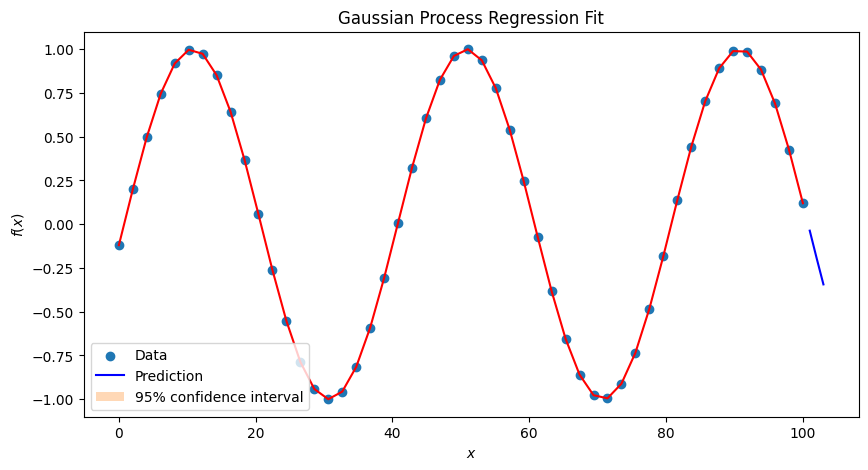

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714, 16.326531, 18.367347,
    20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245, 32.653061, 34.693878, 36.734694, 38.775510,
    40.816327, 42.857143, 44.897959, 46.938776, 48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673,
    61.224490, 63.265306, 65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367, 97.959184, 100.000000]).reshape(-1, 1)
    

y = np.array([ -0.119718, 0.199222, 0.497865, 0.745781, 0.917710, 0.996135, 0.973065, 0.850852, 0.641946, 0.367633,
    0.055863, -0.261599, -0.552407, -0.786931, -0.941276, -0.999716, -0.956296, -0.815441, -0.591501, -0.307294,
    0.008222, 0.322901, 0.604679, 0.824848, 0.960975, 0.999189, 0.935597, 0.776679, 0.538626, 0.245693,
    -0.072273, -0.382875, -0.654467, -0.859376, -0.976725, -0.994556, -0.911054, -0.734725, -0.483537, -0.183082,
    0.136027, 0.441277, 0.701565, 0.890372, 0.988461, 0.985836, 0.882766, 0.689753, 0.426461, 0.119718
])


kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian Process Regression Fit')
plt.legend()
plt.show()

In [26]:
df_multiple = pd.read_feather("Project data/timeseries_multiple_frequency.feather")
print(df_single[f'y{50}' ])

0.000000      0.675208
2.040816      0.787535
4.081633      0.878326
6.122449      0.945100
8.163265      0.986031
10.204082     0.999998
12.244898     0.986621
14.285714     0.946265
16.326531     0.880034
18.367347     0.789739
20.408163     0.677848
22.448980     0.547422
24.489796     0.402026
26.530612     0.245637
28.571429     0.082532
30.612245    -0.082831
32.653061    -0.245928
34.693878    -0.402301
36.734694    -0.547672
38.775510    -0.678068
40.816327    -0.789922
42.857143    -0.880177
44.897959    -0.946362
46.938776    -0.986670
48.979592    -0.999998
51.020408    -0.985981
53.061224    -0.945002
55.102041    -0.878183
57.142857    -0.787350
59.183673    -0.674987
61.224490    -0.544167
63.265306    -0.398467
65.306122    -0.241871
67.346939    -0.078661
69.387755     0.086701
71.428571     0.249691
73.469388     0.405853
75.510204     0.550918
77.551020     0.680918
79.591837     0.792298
81.632653     0.882013
83.673469     0.947610
85.714286     0.987295
87.755102  

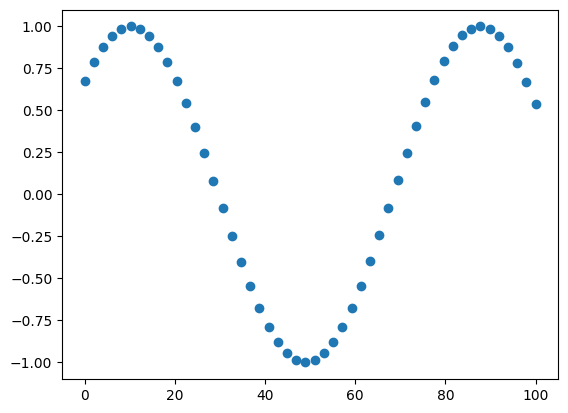

In [27]:
plot_timeseries(df_multiple, indx=50)

/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  4.72**2 * RBF(length_scale=40.6)


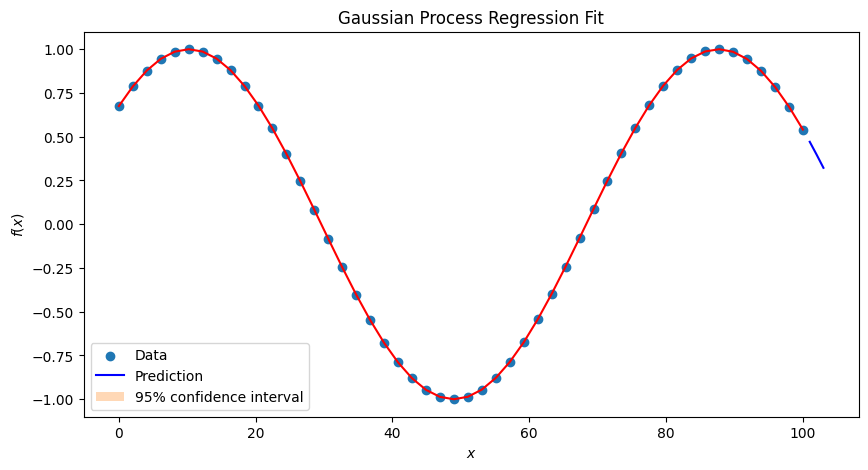

In [40]:
x= np.array([
    0.000000, 2.040816, 4.081633, 6.122449, 8.163265, 10.204082, 12.244898, 14.285714,
    16.326531, 18.367347, 20.408163, 22.448980, 24.489796, 26.530612, 28.571429, 30.612245,
    32.653061, 34.693878, 36.734694, 38.775510, 40.816327, 42.857143, 44.897959, 46.938776,
    48.979592, 51.020408, 53.061224, 55.102041, 57.142857, 59.183673, 61.224490, 63.265306,
    65.306122, 67.346939, 69.387755, 71.428571, 73.469388, 75.510204, 77.551020, 79.591837,
    81.632653, 83.673469, 85.714286, 87.755102, 89.795918, 91.836735, 93.877551, 95.918367,
    97.959184, 100.000000
]).reshape(-1, 1)
y = np.array([
    0.675208, 0.787535, 0.878326, 0.945100, 0.986031, 0.999998, 0.986621, 0.946265,
    0.880034, 0.789739, 0.677848, 0.547422, 0.402026, 0.245637, 0.082532, -0.082831,
    -0.245928, -0.402301, -0.547672, -0.678068, -0.789922, -0.880177, -0.946362, -0.986670,
    -0.999998, -0.985981, -0.945002, -0.878183, -0.787350, -0.674987, -0.544167, -0.398467,
    -0.241871, -0.078661, 0.086701, 0.249691, 0.405853, 0.550918, 0.680918, 0.792298,
    0.882013, 0.947610, 0.987295, 0.999982, 0.985325, 0.943725, 0.876319, 0.784950, 0.672117,
    0.540904
])

kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian Process Regression Fit')
plt.legend()
plt.show()


/opt/conda/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:616: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Optimized hyper parameters:  3.25**2 * RBF(length_scale=44.3)


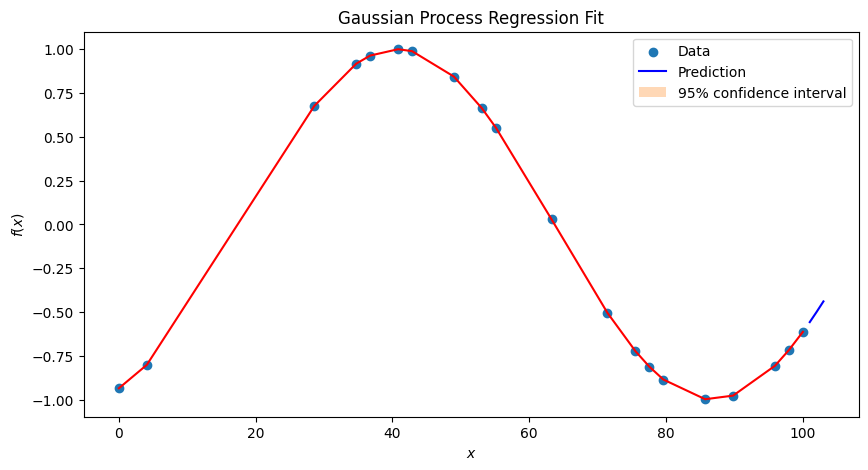

In [44]:
x=np.array([0.000000,4.081633,28.571429,34.693878,36.734694,40.816327, 42.857143, 48.979592,53.061224, 55.102041, 63.265306, 71.428571, 75.510204, 77.551020, 79.591837,85.714286, 89.795918, 95.918367,97.959184,100.000000]).reshape(-1, 1)  
y=np.array([-0.935345, -0.801834, 0.676413, 0.917279, 0.963726, 0.999962, 0.989047, 0.843810,0.663487,0.553060, 0.028283,-0.505068,-0.723138, -0.812117,-0.885332, -0.997870,-0.977275,-0.806904,-0.716976,-0.613131])


kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian Process Regression Fit')
plt.legend()
plt.show()


Optimized hyper parameters:  35**2 * RBF(length_scale=8.63)


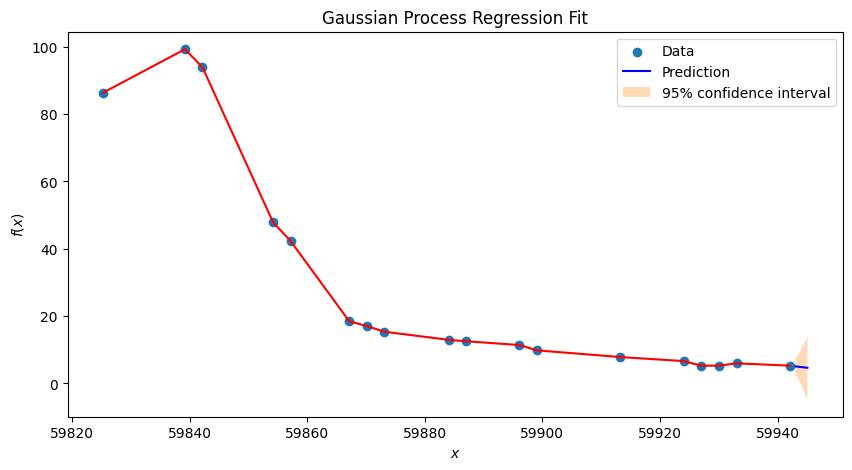

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k

x=np.array([59825.2600,59839.2161,59842.1987,59854.2089,59857.1879,59867.1600,59870.1521,59873.1442,59884.1292,59887.0951,59896.0839,59899.0854,59913.2446,59924.0589,59927.0604,59930.0619,59933.0632,59942.0746]).reshape(-1, 1)
y=np.array([86.338806,
    99.276337,
    93.904762,
   47.852257,
    42.310360,
   18.470497,
   17.048243,
   15.373705,
  12.950831,
 12.540225,
  11.421582,
  9.837990,
  7.855823,
 6.651262,
  5.266479,
  5.318574,
 5.987988,
 5.297144])



kernel = np.var(y) * k.RBF(length_scale=10.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=90)


gp.fit(x, y)
print("Optimized hyper parameters: ", gp.kernel_)
x_new= np.array([x[len(x)-1]+1,x[len(x)-1]+2, x[len(x)-1]+3]).reshape(-1, 1)
y_pred, sigma = gp.predict(x_new, return_std=True)

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data')
plt.plot(x, y, c='r')
plt.plot(x_new, y_pred, 'b-', label='Prediction')
plt.fill_between(
    x_new.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.3,
    label="95% confidence interval"
)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gaussian Process Regression Fit')
plt.legend()
plt.show()
